<a href="https://colab.research.google.com/github/tyriksheyh4567/Healthy-Feet-Bot/blob/main/github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!apt install tesseract-ocr-rus tesseract-ocr-kaz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-rus is already the newest version (1:4.00~git30-7274cfa-1.1).
The following NEW packages will be installed:
  tesseract-ocr-kaz
0 upgraded, 1 newly installed, 0 to remove and 62 not upgraded.
Need to get 1,687 kB of archives.
After this operation, 4,749 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-kaz all 1:4.00~git30-7274cfa-1.1 [1,687 kB]
Fetched 1,687 kB in 1s (2,268 kB/s)
Selecting previously unselected package tesseract-ocr-kaz.
(Reading database ... 126375 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-kaz_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-kaz (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-kaz (1:4.00~git30-7274cfa-1.1) ...


In [13]:
!pip install -U pytesseract

Введите АБСОЛЮТНЫЙ путь:

/content/3-1.jpg


Extracted Text:

Готово к употреблению.
© Начните кормление с 1/2 чайнойложки, © ВАЖНО: не помещайте/не оставляйте

постепенно увеличивая объем. крышечку в зоне доступа, Детей младше
Не разогревайте упаковку в Эб месяцев. Если упаковка вскрыта или
® микроволновой печи. здута, не используйте продукт.

Идеальной пищей для грудного ребенка является молоко матери. В0З рекомендует исключительно пни capa nya
впервые шесть месяцев и ТІЛШІ, введение прикорма при продолжении ШЫ вскармливания. компания Нестле
Южно дольше после введения прикорма.

поддерживает данную рекомендацию. продолжайте грудное вскармливание как

  

     
     
   
  

      
      

Пищевая ценность/ 100: ес780 Продуқ;-> Звоните и пишите
Тағамдық құндылығы: 100r Качество Жизн, [=I contact@ru.nestle.com

Белки/Акуьз O4r
Жиры/Май г
'Углеводы/Кемурсу 1dr
Калий Калий 150 мг
Энергетическая ценность] 211 Дж/
Энергетикалық құндылығы. 50 ккал

88002002055 Звонки по России

>) 91801055 М Звонки по Казахаану
> 8810001105 37 Звонки по Беларуси
3 мми

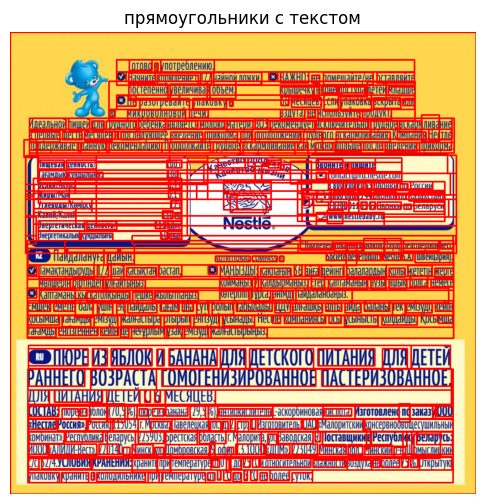

In [24]:
from google.colab.patches import *
import cv2
import pytesseract
from matplotlib import pyplot as plt
from rich.console import Console
import sys

console = Console()
useful_string = "[on white][black]Введите[/black] [bold italic blue underline]АБСОЛЮТНЫЙ[/bold italic blue underline] [black]путь:[/black][/on white]"
path = console.input(useful_string)

img = cv2.imread(path)
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

extracted_text = pytesseract.image_to_string(image_rgb, lang='eng+rus+kaz')
extracted_text = extracted_text.strip()
console.print("[bold]Extracted Text:[/bold]")
print(extracted_text)

data = pytesseract.image_to_data(image_rgb, output_type=pytesseract.Output.DICT)

n_boxes = len(data['level'])
for i in range(n_boxes):
    (x, y, w, h) = (data['left'][i], data['top'][i], data['width'][i], data['height'][i])
    cv2.rectangle(image_rgb, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.title("прямоугольники с текстом")
plt.axis("off")
plt.show()